In [177]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [178]:
tube_lengths = np.array([313, 296, 275, 255, 235, 215, 195, 175, 155, 135, 115, 95, 75]) * 1e-3
tube_length_err = 0.5 * 1e-3
tube_length_linspace = np.linspace(75e-3, 313e-3)
def tube_freq(l, n=1, v=343.00):
    return (2*n - 1)*v/(4*l)

In [179]:
harmonics1 = np.array([263.93, 279.08, 299.76, 323.66, 353.6, 379.46, 417.28, 463.01, 516.09, 579.79, 681.76, 804.82, 1010.84])
harmonics2 = np.array([791.94, 837.23, 400.41, 973.6, 1095.3, 1133.93, 1231.62, 1376.02, 1231.28, 1384.31, 2078.03, 2443.65, np.NaN])
harmonics3 = np.array([1321.57, 1413.22, 1504.67, 1627.58, 1755.71, 1909.43, 2096.49, 2335.92, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN])
harmonics4 = np.array([1863.69, 1976.29, 2124.29, np.NaN, 2467.44, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN])

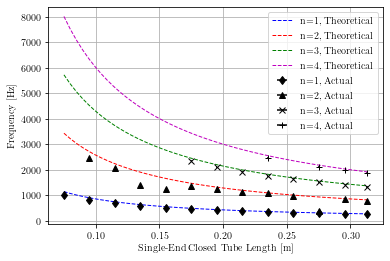

In [180]:
plt.errorbar(tube_lengths, harmonics1, xerr=tube_length_err, fmt='kd', label='n=1, Actual')
plt.plot(tube_length_linspace, tube_freq(tube_length_linspace), 'b--', linewidth=1, label='n=1, Theoretical')

plt.errorbar(tube_lengths, harmonics2, xerr=tube_length_err, fmt='k^', label='n=2, Actual')
plt.plot(tube_length_linspace, tube_freq(tube_length_linspace, n=2), 'r--', linewidth=1, label='n=2, Theoretical')

plt.errorbar(tube_lengths, harmonics3, xerr=tube_length_err, fmt='kx', label='n=3, Actual')
plt.plot(tube_length_linspace, tube_freq(tube_length_linspace, n=3), 'g--', linewidth=1, label='n=3, Theoretical')

plt.errorbar(tube_lengths, harmonics4, xerr=tube_length_err, fmt='k+', label='n=4, Actual')
plt.plot(tube_length_linspace, tube_freq(tube_length_linspace, n=4), 'm--', linewidth=1, label='n=4, Theoretical')

plt.xlabel(r'Single-End Closed Tube Length [m]')
plt.ylabel(r'Frequency [Hz]')
plt.grid()
plt.legend()

In [215]:
finv1 = 1 / harmonics1
finv2 = 1 / harmonics2
finv3 = 1 / harmonics3
finv4 = 1 / harmonics4

# We have to cleanup NaN values
cond = np.isfinite(finv1) & np.isfinite(tube_lengths)
finv1 = finv1[cond]
tube_lengths1 = tube_lengths[cond]
cond = np.isfinite(finv2) & np.isfinite(tube_lengths)
finv2 = finv2[cond]
tube_lengths2 = tube_lengths[cond]
cond = np.isfinite(finv3) & np.isfinite(tube_lengths)
finv3 = finv3[cond]
tube_lengths3 = tube_lengths[cond]
cond = np.isfinite(finv4) & np.isfinite(tube_lengths)
finv4 = finv4[cond]
tube_lengths4 = tube_lengths[cond]

finv1fit, finv1fitcov = np.polyfit(tube_lengths1, finv1, 1, cov=True)
finv1fitf = np.poly1d(finv1fit)
finv2fit, finv2fitcov = np.polyfit(tube_lengths2, finv2, 1, cov=True)
finv2fitf = np.poly1d(finv2fit)
finv3fit, finv3fitcov = np.polyfit(tube_lengths3, finv3, 1, cov=True)
finv3fitf = np.poly1d(finv3fit)
finv4fit, finv4fitcov = np.polyfit(tube_lengths4, finv4, 1, cov=True)
finv4fitf = np.poly1d(finv4fit)

print(1)
print(finv1fit)
finv1fitu = np.sqrt(np.diag(finv1fitcov))
print(finv1fitu)

print(2)
print(finv2fit)
finv2fitu = np.sqrt(np.diag(finv2fitcov))
print(finv2fitu)

print(3)
print(finv3fit)
finv3fitu = np.sqrt(np.diag(finv3fitcov))
print(finv3fitu)

print(4)
print(finv4fit)
finv4fitu = np.sqrt(np.diag(finv4fitcov))
print(finv4fitu)

1
[0.01165094 0.0001273 ]
[5.76040102e-05 1.20244623e-05]
2
[ 5.25083199e-03 -9.76297281e-05]
[0.00169512 0.00036646]
3
[2.34546813e-03 1.83606903e-05]
[2.27526837e-05 5.66728543e-06]
4
[1.67646520e-03 1.06569597e-05]
[2.26859365e-05 6.38070950e-06]


/home/marko/.local/lib/python3.9/site-packages/tikzplotlib/_cleanfigure.py:166: UserWarning: Cleaning Line Collections (scatter plot) is not supported yet.
  warnings.warn(


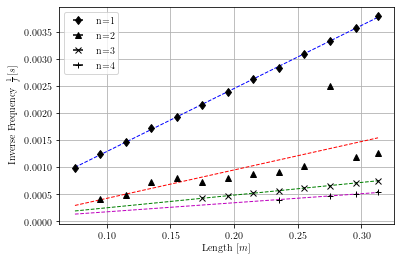

In [187]:
plt.errorbar(tube_lengths1, finv1, xerr=tube_length_err, fmt='kd', label='n=1')
plt.plot(tube_length_linspace, finv1fitf(tube_length_linspace), 'b--', linewidth=1)

plt.errorbar(tube_lengths2, finv2, xerr=tube_length_err, fmt='k^', label='n=2')
plt.plot(tube_length_linspace, finv2fitf(tube_length_linspace), 'r--', linewidth=1)

plt.errorbar(tube_lengths3, finv3, xerr=tube_length_err, fmt='kx', label='n=3')
plt.plot(tube_length_linspace, finv3fitf(tube_length_linspace), 'g--', linewidth=1)

plt.errorbar(tube_lengths4, finv4, xerr=tube_length_err, fmt='k+', label='n=4')
plt.plot(tube_length_linspace, finv4fitf(tube_length_linspace), 'm--', linewidth=1)

plt.legend()
plt.grid()
plt.xlabel('Length $[m]$')
plt.ylabel(r'Inverse Frequency $\frac{1}{f} [s]$')

tikzplotlib.clean_figure()
tikzplotlib.save('../report/graphs/l-1f-rel.tex')

In [221]:
def nuf(k, n):
    return 4 / (k * (2*n - 1))
def nufu(k, delk, n):
    return nuf(k, n) * delk / k
nus = np.array([nuf(finv1fit[0], 1), nuf(finv2fit[0], 2), nuf(finv3fit[0], 3), nuf(finv4fit[0], 4)])
nusu = np.array([nufu(finv1fit[0], finv1fitu[0], 1), nufu(finv2fit[0], finv2fitu[0], 2), nufu(finv3fit[0], finv3fitu[0], 3), nufu(finv4fit[0], finv4fitu[0], 4)])
print(nus, nusu)

[343.31998292 253.92801278 341.083296   340.85322516] [ 1.69742616 81.97541007  3.30874688  4.61242774]
